In [7]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["JPY", "EUR"]
    total: float

In [8]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_jpy(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 146
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.86
    return state

def choose_conversion(state: PortfolioState) -> str:
    return state["target_currency"]

In [9]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_jpy_node", convert_to_jpy)
builder.add_node("convert_to_eur_node", convert_to_eur)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "JPY" : "convert_to_jpy_node",
        "EUR" : "convert_to_eur_node",
    }
)
builder.add_edge(["convert_to_eur_node", "convert_to_jpy_node"], END)
graph = builder.compile()

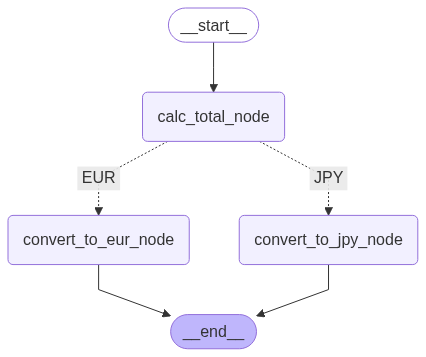

In [4]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({"amount_usd": 1000, "target_currency": "EUR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 928.8}

In [10]:
graph.invoke({"amount_usd": 1000, "target_currency": "JPY"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'JPY',
 'total': 157680.0}